<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab7/deepLearningUsingFunctionalAPI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries that we will be using for building the neural network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input,Concatenate

In [ ]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input1= Input(shape=1)
input2= Input(shape=1)

l1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input1)
l1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l1)

l2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input2)
l2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l2)

concatted = Concatenate()([l1, l2])
out=Dense(units=2,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted)


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model=Model([input1,input2],[out])

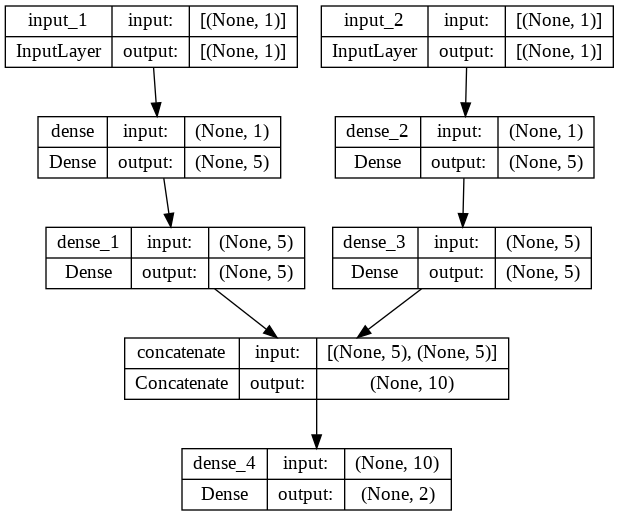

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
path='/content/drive/MyDrive/CSE 442/DataDeepLearning.csv'


In [ ]:
import pandas
inputDataFrame=pandas.read_csv(path)
inputDataFrame

,x1,x2,y1=4*x1+5*x2+5,y2=10*x1+10*x2,y3=3*x1+10*x2
0,80,58,615,1380,820
1,19,87,516,1060,927
2,81,4,349,850,283
3,25,34,275,590,415
4,8,63,352,710,654
...,...,...,...,...,...
994,49,8,241,570,227
995,23,90,547,1130,969
996,85,23,460,1080,485
997,42,18,263,600,306


In [ ]:
# Getting the data out as numpy arrays
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [ ]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)

In [ ]:
y1s=y1s.reshape(y1s.shape[0],1)
y2s=y2s.reshape(y2s.shape[0],1)
ys=np.concatenate((y1s,y2s),axis=1)

In [ ]:
ys

array([[ 615, 1380],
       [ 516, 1060],
       [ 349,  850],
       ...,
       [ 460, 1080],
       [ 263,  600],
       [ 641, 1460]])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x1Train, x1Test, x2Train, x2Test, yTrain, yTest = train_test_split(x1s,x2s,ys, test_size=0.20, random_state=42)

In [ ]:
print(f'the shape of x1Train = {x1Train.shape}')
print(f'the shape of x1Test = {x1Test.shape}')

print(f'the shape of x2Train = {x2Train.shape}')
print(f'the shape of x2Test = {x2Test.shape}')

print(f'the shape of yTrain = {yTrain.shape}')
print(f'the shape of yTest = {yTest.shape}')

the shape of x1Train = (799, 1)
the shape of x1Test = (200, 1)
the shape of x2Train = (799, 1)
the shape of x2Test = (200, 1)
the shape of yTrain = (799, 2)
the shape of yTest = (200, 2)


In [ ]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [ ]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(x=[x1Train,x2Train],y=[yTrain],validation_data=([x1Test,x2Test],[yTest]),batch_size=256, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 67ms/step - loss: 301830.1250 - mse: 301830.1250 - val_loss: 248783.4375 - val_mse: 248783.4375
Epoch 2/300
4/4 [==============================] - 0s 16ms/step - loss: 236292.6094 - mse: 236292.6094 - val_loss: 187603.7812 - val_mse: 187603.7812
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 174718.8438 - mse: 174718.8438 - val_loss: 130019.1562 - val_mse: 130019.1562
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 117315.7969 - mse: 117315.7969 - val_loss: 78764.1172 - val_mse: 78764.1172
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 67905.5156 - mse: 67905.5156 - val_loss: 38430.9961 - val_mse: 38430.9961
Epoch 6/300
4/4 [==============================] - 0s 11ms/step - loss: 30609.0742 - mse: 30609.0742 - val_loss: 13086.2773 - val_mse: 13086.2773
Epoch 7/300
4/4 [==============================] - 0s 13ms/step - loss: 9212.2305 - mse: 9212.2305 - val_loss:

In [ ]:
input=[x1Test[60],x2Test[60]]
output=model.predict(input)

1/1 [==============================] - 0s 100ms/step


In [ ]:
input

[array([68]), array([84])]

In [ ]:
yTest[60]

array([ 697, 1520])

In [ ]:
output

array([[ 698.1416, 1518.8073]], dtype=float32)